### Importing Libraries

In [946]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import pickle
import warnings
warnings.filterwarnings('ignore')

### Loading the dataset

In [947]:
bigdatamart_Train = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Train.csv")
bigdatamart_Test = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Test.csv")
bigdatamart_Train  # Loading of 'bigdatamart_Train.csv' data file in 'bigdatamart" dataframe

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [948]:
bigdatamart_Test   # Loading of 'bigdatamart_Test.csv' data file in 'bigdatamart" dataframe

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


### Checking the Datatypes of the Columns

In [949]:
bigdatamart_Train.dtypes  # checking the data types of the columns whether it is int, float or string datatypes 

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

Item_Fat_Content, Item_Type,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type are object type meaning they are categorical in nature, while Outlet_Establishment_Year is discrete int type,

Item_Weight, Item_Visibility, Item_MRP, Item_Outlet_Sales are float type and continuous in nature.

### Dataframe Description:
Problem Statement:

The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing the sales of their products.

Features:

Item_Identifier : ID of item

Item_Weight : Weight of item

Item_Fat_Content : Fat content of the item

Item_Visibility: Estimates the customer reach of the item

Item_Type : Type of item

Item_MRP : Maximum Retail Price of Item

Outlet_Identifier : ID of Retail Outlet

Outlet_Establishment_Year : Year in which Retail Outlet was established

Outlet_Size : Size of Outlet

Outlet_Location_Type : The tier of the city where the Retail outlet is located

Outlet_Type : whether grocery store or a type of supermarket

Label/Target Variable:

Item_Outlet_Sales: The total sales made by an outlet

To find out the sales of each product using two datasets:

bigdatamart_Train.csv

bigdatamart_Test.csv

### Exploratory Data Analysis (EDA)

In [950]:
bigdatamart_Test1 = bigdatamart_Test.copy()
bigdatamart_Train.shape,bigdatamart_Test.shape #  to get the no. of rows and columns in the bigdatamart dataset.

((8523, 12), (5681, 11))

In [951]:
bigdatamart_Train.head()  # to get first five values from the bigdatamart_Train.csv dataset.

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [953]:
bigdatamart_Test["Outlet_Size"].unique() # to get the unique values 

array(['Medium', nan, 'Small', 'High'], dtype=object)

### Getting the basic summary and statistical information of the data.

In [954]:
bigdatamart_Train.nunique() # returns a scalar value which is the count of all the unique values in the Index.

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

Item_Fat_Content has 5 unique categories

Item_Type has 16 unique categories

Outlet_Identifier has 10 unique categories

Outlet_Establishment_Year 9 discrete values

Outlet_Size has 3 unique categories

Outlet_Location_Type has 3 unique categories

Outlet_Type has 4 unique categories

In [955]:
bigdatamart_Test.nunique() # returns a scalar value which is the count of all the unique values in the Index.

Item_Identifier              1543
Item_Weight                   410
Item_Fat_Content                5
Item_Visibility              5277
Item_Type                      16
Item_MRP                     4402
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
dtype: int64

Item_Fat_Content has 5 unique categories

Item_Type has 16 unique categories

Outlet_Identifier has 10 unique categories

Outlet_Establishment_Year 9 discrete values

Outlet_Size has 3 unique categories

Outlet_Location_Type has 3 unique categories

Outlet_Type has 4 unique categories

In [956]:
bigdatamart_Train.isna().sum() # to detect missing values for an array-like-object

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [957]:
bigdatamart_Train.shape

(8523, 12)

'Item Weight' has 17.16% null values

'Outlet_Size' has 28.27% null values

In [958]:
bigdatamart_Test.isna().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [959]:
bigdatamart_Test.shape

(5681, 11)

'Item Weight' has 17.18% null values

'Outlet_Size' has 28.26% null values

In [960]:
bigdatamart_Train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [961]:
bigdatamart_Test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


From the above tables it is observed that the outlets have been operating from as early as 1985, on an average the outlets have been running since 1997, with last one having been established in 2009.

The average MRP of the items is 140.9 and 50% of the items are priced upto around 143.

The average sales made by the outlets is 2181.28

In [962]:
map1 = {"Small":1,"Medium":2,"High":3} #returns a map object after applying the given function to each item of a given list. 
bigdatamart_Train["Outlet_Size"] = bigdatamart_Train["Outlet_Size"].map(map1)
bigdatamart_Train["Item_Weight"] = bigdatamart_Train["Item_Weight"].fillna(bigdatamart_Train.Item_Weight.mean())
bigdatamart_Train["Outlet_Size"] = bigdatamart_Train["Outlet_Size"].fillna(bigdatamart_Train["Outlet_Size"].median())

In [963]:
bigdatamart_Train.Outlet_Size.value_counts()

2.0    5203
1.0    2388
3.0     932
Name: Outlet_Size, dtype: int64

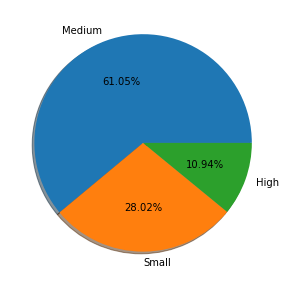

In [964]:
labels = 'Medium','Small','High' 
fig, ax = plt.subplots()
ax.pie(bigdatamart_Train.Outlet_Size.value_counts(),labels = labels,radius =1,autopct = '%1.2f%%', shadow=True,)
plt.show()

Medium Sized outlets form the majority with 61.05% of total outlets, Small outlets are 28.02% while High sized outlets are 10.94% of the total outlets.

In [965]:
bigdatamart_Train.Outlet_Location_Type.value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

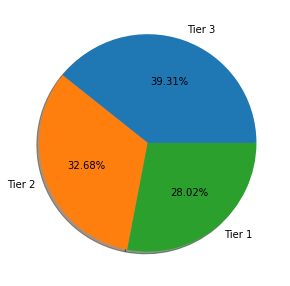

In [966]:
labels = 'Tier 3','Tier 2','Tier 1' 
fig, ax = plt.subplots()
ax.pie(bigdatamart_Train.Outlet_Location_Type.value_counts(),labels = labels,radius =1,autopct = '%1.2f%%', shadow=True,)
plt.show()

39.31% of total outlets are in Tier 3 cities, 32.68% of the outlets are in Tier 2 cities while 28.02% of the total outlets are in Tier 1 cities.

In [967]:
bigdatamart_Train.Outlet_Type.value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [968]:
bigdatamart_Test.Outlet_Size.value_counts()

Medium    1862
Small     1592
High       621
Name: Outlet_Size, dtype: int64

In [869]:
map1 = {"Small":1,"Medium":2,"High":3} #returns a map object after applying the given function to each item of a given list. 
bigdatamart_Test["Outlet_Size"] = bigdatamart_Test["Outlet_Size"].map(map1)
bigdatamart_Test["Item_Weight"] = bigdatamart_Test["Item_Weight"].fillna(bigdatamart_Test.Item_Weight.mean())
bigdatamart_Test["Outlet_Size"] = bigdatamart_Test["Outlet_Size"].fillna(bigdatamart_Test["Outlet_Size"].median())

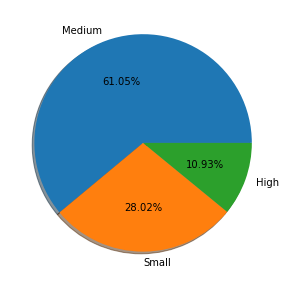

In [870]:
labels = 'Medium','Small','High' 
fig, ax = plt.subplots()
ax.pie(bigdatamart_Test.Outlet_Size.value_counts(),labels = labels,radius =1,autopct = '%1.2f%%', shadow=True,)
plt.show()

Medium Sized outlets form the majority with 61.05% of total outlets, Small outlets are 28.02% while High sized outlets are 10.93 of the total outlets.

In [871]:
bigdatamart_Train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,2.0,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,2.0,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,2.0,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,2.0,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,3.0,Tier 3,Supermarket Type1,994.7052


### Model Visualization

<AxesSubplot:xlabel='Item_Type', ylabel='count'>

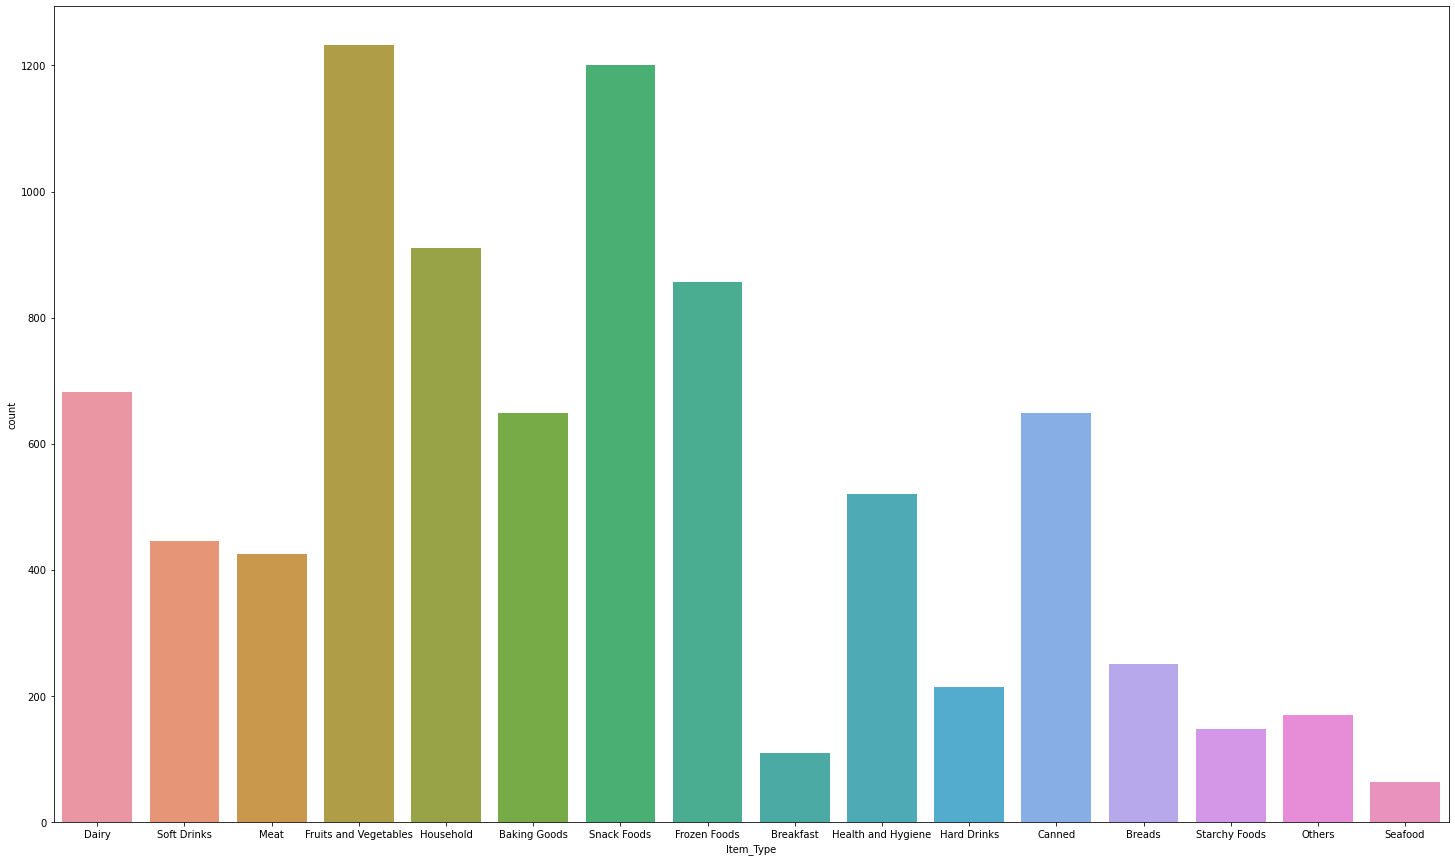

In [872]:
plt.figure(figsize=(25,15))
sns.countplot(bigdatamart_Train.Item_Type)

Most bought items are Fruits and Vegetables, Household items, Snack Food, and Frozen foods.

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='count'>

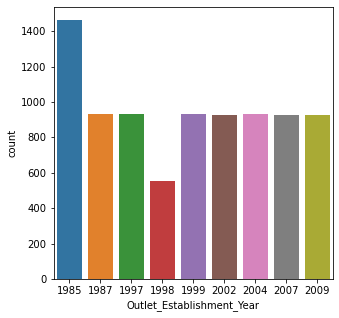

In [873]:
sns.countplot(bigdatamart_Train.Outlet_Establishment_Year)

Highest number of outlets were established in 1985. With the exception of 1998,1987,1997,1999,2002,2004,2007,2009 saw a similar number of new outlets having been established.

array([[<AxesSubplot:title={'center':'Item_Weight'}>,
        <AxesSubplot:title={'center':'Item_Visibility'}>],
       [<AxesSubplot:title={'center':'Item_MRP'}>,
        <AxesSubplot:title={'center':'Outlet_Establishment_Year'}>],
       [<AxesSubplot:title={'center':'Outlet_Size'}>,
        <AxesSubplot:title={'center':'Item_Outlet_Sales'}>]], dtype=object)

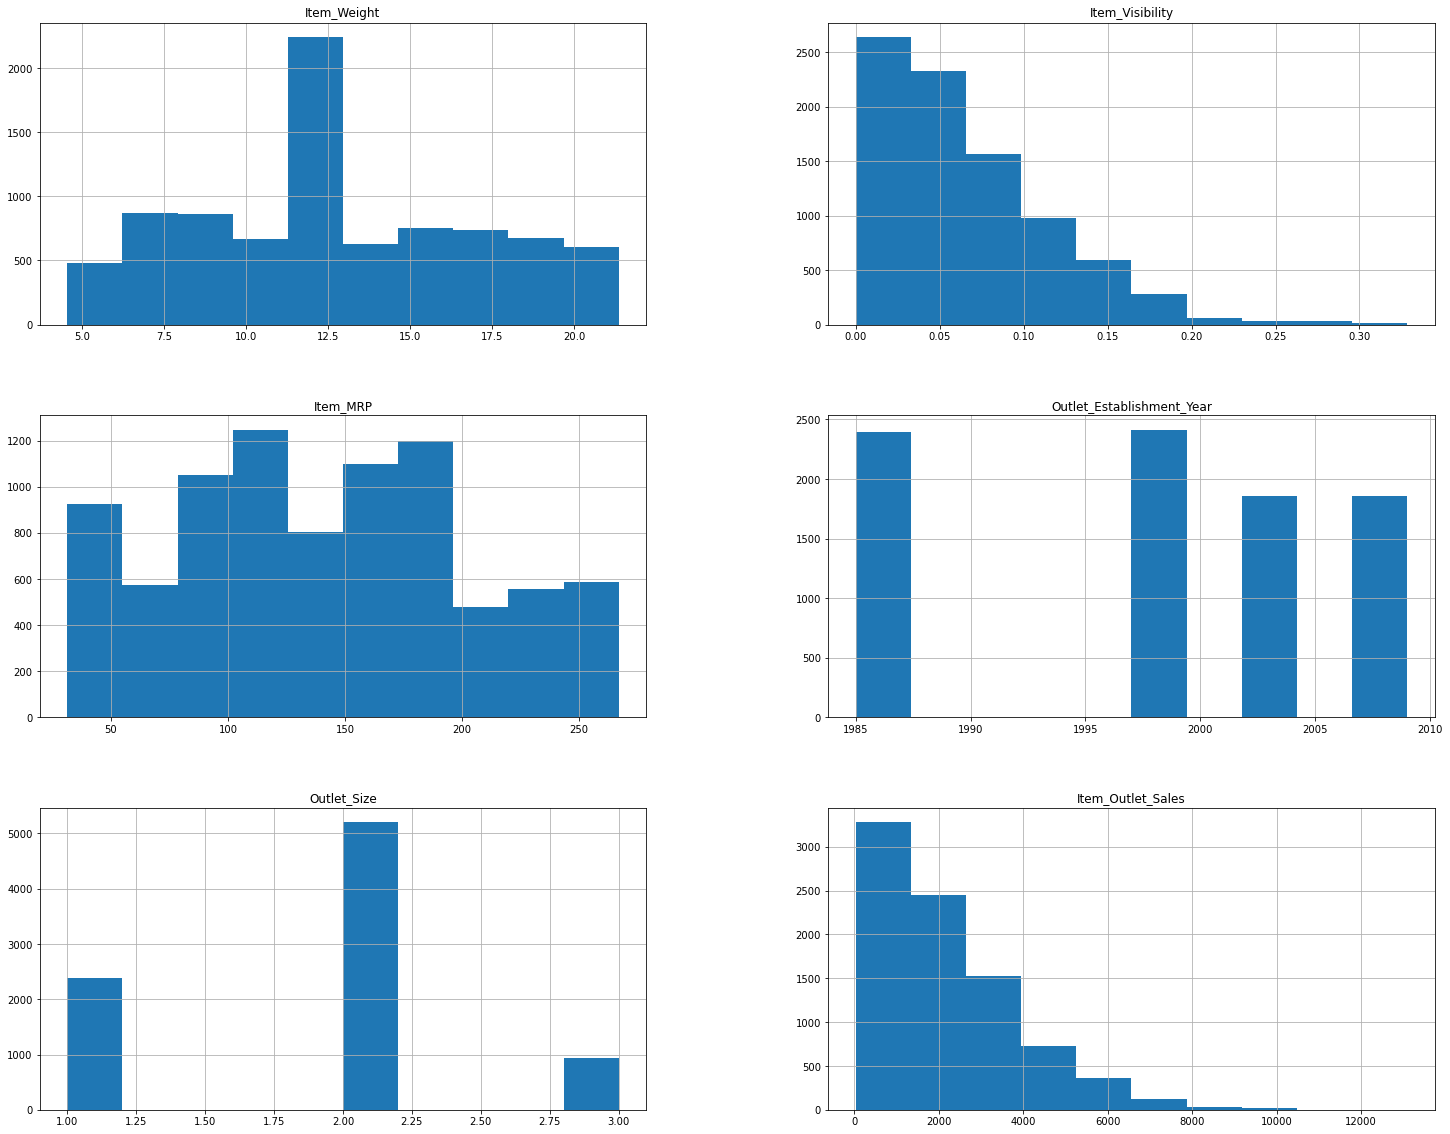

In [874]:
bigdatamart_Train.hist(figsize=(25,20))

Data distribution is right skewed with values trailing off from 0.19 mark

Data looks normally distributed with mean,median and mode values falling within 10.0-15.0 range

### Interpreting Relationship between Dependent Variable and Independent Variables

### 'Item_Outlet_Sales' vs MRP

### 'Item_Outlet_Sales' vs Continuous Data Columns

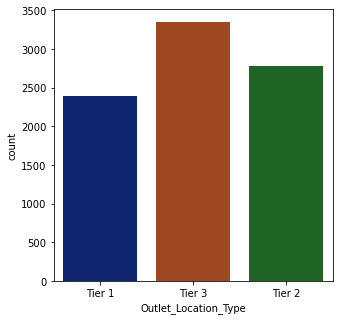

In [875]:
sns.countplot(bigdatamart_Train["Outlet_Location_Type"],palette = 'dark')
plt.show()

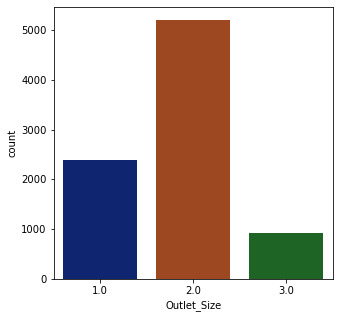

In [876]:
sns.countplot(bigdatamart_Train["Outlet_Size"],palette = 'dark')
plt.show()

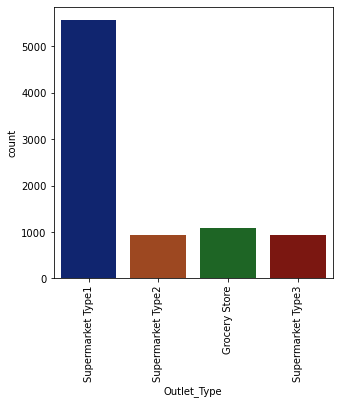

In [877]:
sns.countplot(bigdatamart_Train["Outlet_Type"],palette = 'dark')
plt.xticks(rotation = 90)
plt.show()

From the graph it is observed that Tier 3 Cities generate the most sales and have a good mix of Supermarket Type 2 and Type 3 along with Grocery stores.

Tier 2 and Tier 1 cities have more of Supermarket Type1 with a few Grocery stores.

Outlet_Location_Type has a good relation with Item_Outlet_sales

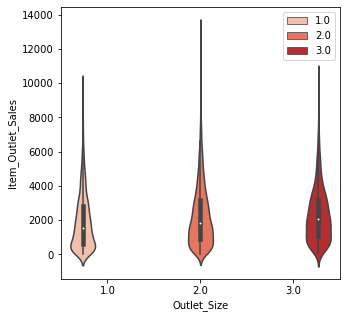

In [878]:
sns.violinplot(x=bigdatamart_Train["Outlet_Size"],y=bigdatamart_Train["Item_Outlet_Sales"],hue = bigdatamart_Train["Outlet_Size"],palette = "Reds")
plt.legend()
plt.show()

From this voilin graph it is observed that Medium Sized Outlets generate the Highest sales and are a mix of Supermaraket Type1,Type2,Type3 and Grocery Stores.

High and small Sized Outlets comprise mostly of Supermarket Type1

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

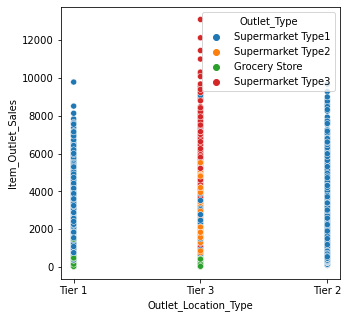

In [879]:
sns.scatterplot(data=bigdatamart_Train, x='Outlet_Location_Type', y='Item_Outlet_Sales', hue='Outlet_Type')

From the graph it is observed that Tier 3 Cities generate the most sales and have a good mix of Supermarket Type 2 and Type 3 along with Grocery stores.

Tier 2 and Tier 1 cities have more of Supermarket Type1 with a few Grocery stores.

Outlet_Location_Type has a good relation with Item_Outlet_sales

<AxesSubplot:xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

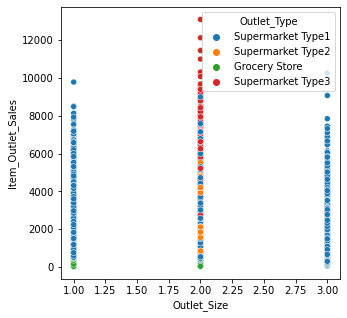

In [880]:
sns.scatterplot(data=bigdatamart_Train, x='Outlet_Size', y='Item_Outlet_Sales', hue='Outlet_Type')

From the graph it is observed that Medium Sized Outlets generate the Highest sales and are a mix of Supermaraket Type1,Type2,Type3 and Grocery Stores.

High and small Sized Outlets comprise mostly of Supermarket Type1

### Extracting the age of outlets from Outlet_Establishment_Year column will give a better insight into its relationship with target column data.

In [881]:
bigdatamart_Train['Age'] =bigdatamart_Train['Outlet_Establishment_Year'].apply(lambda y: 2021 - y) 

bigdatamart_Test['Age'] =bigdatamart_Test['Outlet_Establishment_Year'].apply(lambda x: 2021 - x)

In [882]:
bigdatamart_Train.drop(columns = ["Outlet_Establishment_Year"],inplace = True) # delete that label from dataframe.
bigdatamart_Test.drop(columns = ["Outlet_Establishment_Year"],inplace = True)

In [883]:
bigdatamart_Test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Age
0,FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,2.0,Tier 1,Supermarket Type1,22
1,FDW14,8.300000,reg,0.038428,Dairy,87.3198,OUT017,2.0,Tier 2,Supermarket Type1,14
2,NCN55,14.600000,Low Fat,0.099575,Others,241.7538,OUT010,2.0,Tier 3,Grocery Store,23
3,FDQ58,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2.0,Tier 2,Supermarket Type1,14
4,FDY38,12.695633,Regular,0.118599,Dairy,234.2300,OUT027,2.0,Tier 3,Supermarket Type3,36


In [884]:
bigdatamart_Train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,2.0,Tier 1,Supermarket Type1,3735.1380,22
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2.0,Tier 3,Supermarket Type2,443.4228,12
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,2.0,Tier 1,Supermarket Type1,2097.2700,22
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,2.0,Tier 3,Grocery Store,732.3800,23
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,3.0,Tier 3,Supermarket Type1,994.7052,34


<AxesSubplot:xlabel='Age', ylabel='count'>

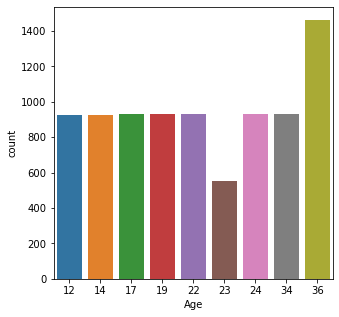

In [885]:
sns.countplot(bigdatamart_Train.Age)

Highest number of outlet is 36 years old

Item_Weight 431 Item_Fat_Content 5 Item_Visibility 7880 Item_Type 16 Item_MRP 5938 Outlet_Identifier 10 Outlet_Establishment_Year 9 Outlet_Size 3 Outlet_Location_Type 3 Outlet_Type 4 Item_Outlet_Sales 3493 dtype: int64

### Item_fat_Content is not Applicable to 'Inedibles', therefore creating a separate category for them under 'Item_Fat_Content'

In [886]:
bigdatamart_Train.loc[bigdatamart_Train['Item_Type']=="Inedibles",'Item_Fat_Content'] = "Inedible" 
#assigns all those values in 'Item_Fat_Content' column to 'Inedible' category, which correspond to values in 'Item_Type' column

In [887]:
bigdatamart_Test.loc[bigdatamart_Test['Item_Type']=="Inedibles",'Item_Fat_Content'] = "Inedible" 
#assigns all those values in 'Item_Fat_Content' column to 'Inedible' category, which correspond to values in 'Item_Type' column

In [936]:
bigdatamart_Train.head(10)

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Age,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Outlet_Location_Type_Tier 1,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,9.300000,0.016047,249.8092,3735.1380,22,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,5.920000,0.019278,48.2692,443.4228,12,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,17.500000,0.016760,141.6180,2097.2700,22,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
3,19.200000,0.000000,182.0950,732.3800,23,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,8.930000,0.000000,53.8614,994.7052,34,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
5,10.395000,0.000000,51.4008,556.6088,12,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6,13.650000,0.012741,57.6588,343.5528,34,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7,12.857645,0.127470,107.7622,4022.7636,36,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
8,16.200000,0.016687,96.9726,1076.5986,19,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,19.200000,0.094450,187.8214,4710.5350,14,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [892]:
bigdatamart_Test.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Age
0,FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,2.0,Tier 1,Supermarket Type1,22
1,FDW14,8.300000,reg,0.038428,Dairy,87.3198,OUT017,2.0,Tier 2,Supermarket Type1,14
2,NCN55,14.600000,Low Fat,0.099575,Others,241.7538,OUT010,2.0,Tier 3,Grocery Store,23
3,FDQ58,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2.0,Tier 2,Supermarket Type1,14
4,FDY38,12.695633,Regular,0.118599,Dairy,234.2300,OUT027,2.0,Tier 3,Supermarket Type3,36
5,FDH56,9.800000,Regular,0.063817,Fruits and Vegetables,117.1492,OUT046,1.0,Tier 1,Supermarket Type1,24
6,FDL48,19.350000,Regular,0.082602,Baking Goods,50.1034,OUT018,2.0,Tier 3,Supermarket Type2,12
7,FDC48,12.695633,Low Fat,0.015782,Baking Goods,81.0592,OUT027,2.0,Tier 3,Supermarket Type3,36
8,FDN33,6.305000,Regular,0.123365,Snack Foods,95.7436,OUT045,2.0,Tier 2,Supermarket Type1,19
9,FDA36,5.985000,Low Fat,0.005698,Baking Goods,186.8924,OUT017,2.0,Tier 2,Supermarket Type1,14


### Interpreting Relationship between Dependent Variable and Independent Variables

### 'Item_Outlet_Sales' vs MRP

### 'Item_Outlet_Sales' vs Continuous Data Columns

In [893]:
X = bigdatamart_Train[['Item_MRP','Item_Weight','Item_Visibility']]
y = bigdatamart_Train['Item_Outlet_Sales']

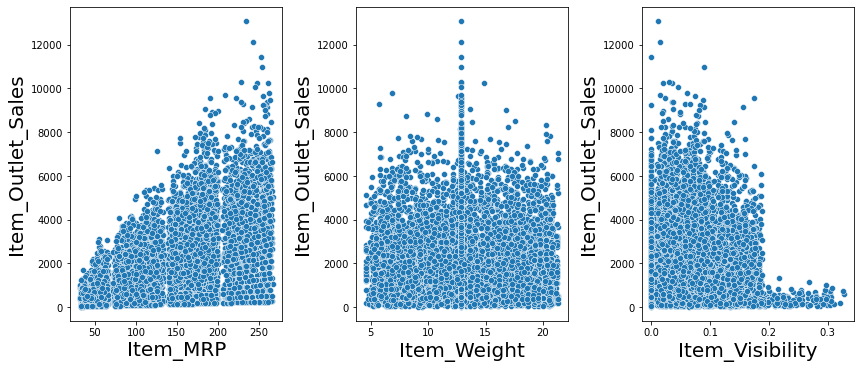

In [894]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
for col in X:
    if plotnum<=23:
        plt.subplot(5,5,plotnum)
        sns.scatterplot(X[col],y)
        plt.xlabel(col,fontsize=20)
        plt.ylabel('Item_Outlet_Sales',fontsize=20)
    plotnum+=1
plt.tight_layout()

From the graph above, it is observed that There is a positive linear relationship between Item_Outlet_Sales and Item_MRP

'Item_Outlet_Sales' vs Categorical/Discrete Data Columns

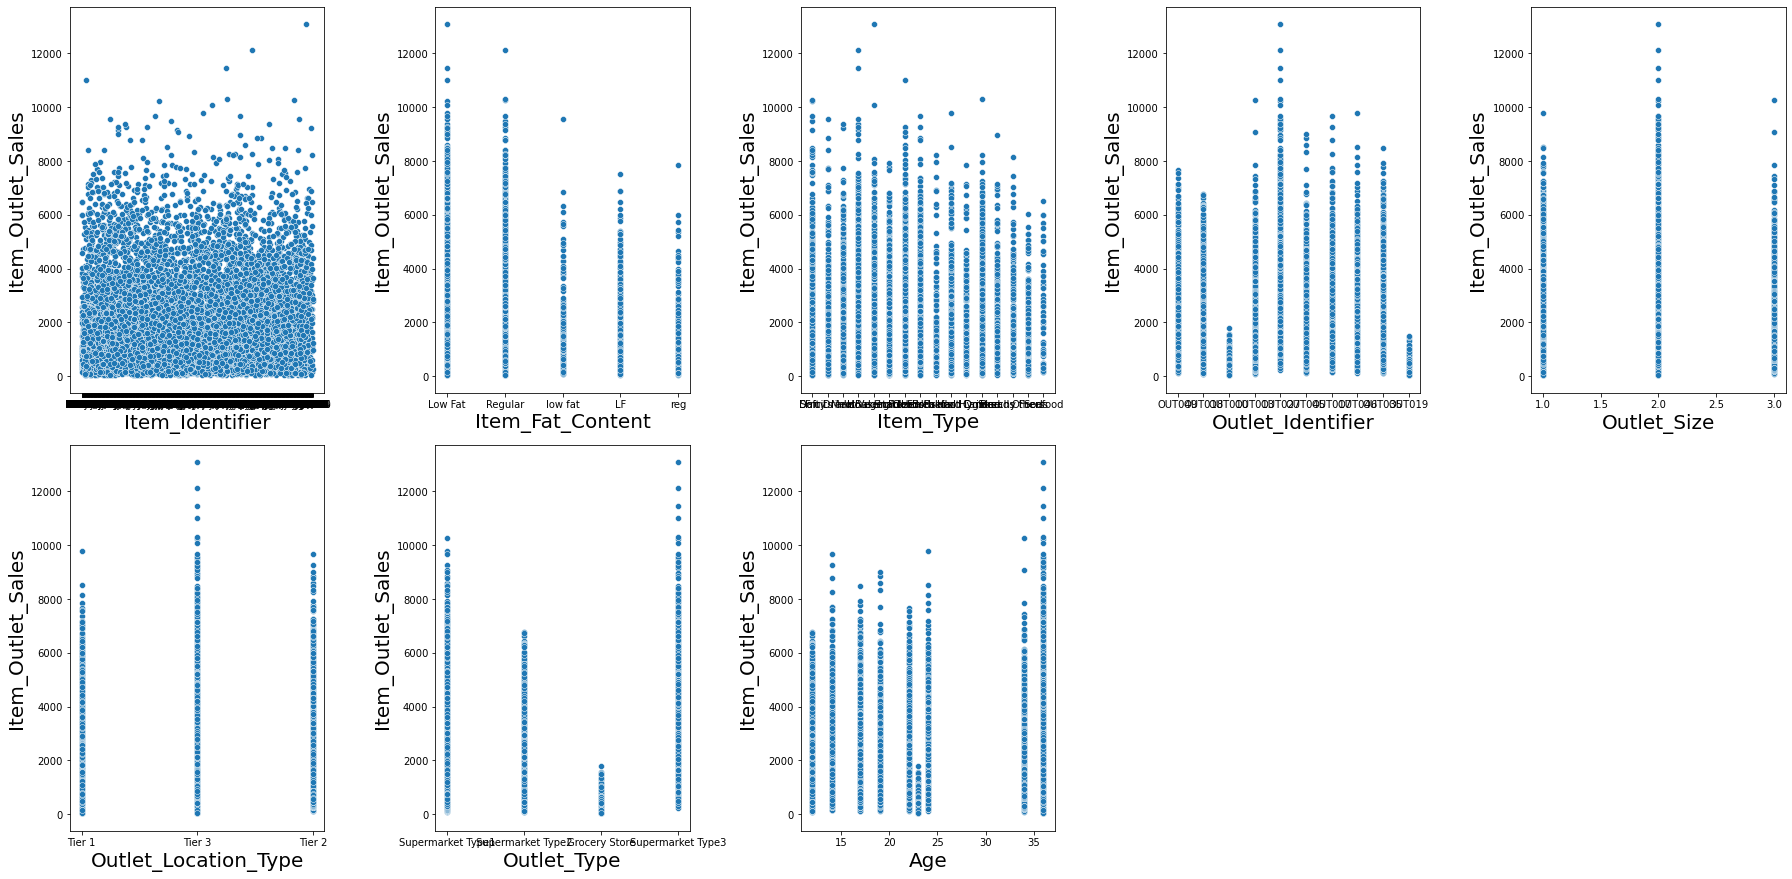

In [895]:
plt.figure(figsize=(25,30),facecolor='white')
plotnum=1
y = bigdatamart_Train['Item_Outlet_Sales']
X = bigdatamart_Train.drop(columns=['Item_MRP','Item_Weight','Item_Visibility','Item_Outlet_Sales'])
for col in X:
    if plotnum<=23:
        plt.subplot(5,5,plotnum)
        sns.scatterplot(X[col],y)
        plt.xlabel(col,fontsize=20)
        plt.ylabel('Item_Outlet_Sales',fontsize=20)
    plotnum+=1
plt.tight_layout()

From the above graphs it is observed that Outlet_type has a positive relation with Item_Outlet_sales.

Supermarket Type3 generates the more sales when compared to the Supermarket types 1 and 2 and Grocery Stores.

Tier 3 City Outlets generate a lot of sales. Age of the establishment also plays an important role when age of the establishment is above 30. This maybe because Outlets that have been running for the longest sell the highest.

### Encoding Categorical Columns using get_dummies()

In [896]:
feat = ['Outlet_Size','Outlet_Type','Outlet_Location_Type','Item_Fat_Content',"Item_Type"]
X = pd.get_dummies(bigdatamart_Train[feat])
bigdatamart_Train = pd.concat([bigdatamart_Train,X],axis=1)

In [897]:
bigdatamart_Train.head() # to get the first n rows

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,2.0,Tier 1,Supermarket Type1,...,0,0,0,0,0,0,0,0,0,0
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2.0,Tier 3,Supermarket Type2,...,0,0,0,0,0,0,0,0,1,0
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,2.0,Tier 1,Supermarket Type1,...,0,0,0,0,1,0,0,0,0,0
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,2.0,Tier 3,Grocery Store,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,3.0,Tier 3,Supermarket Type1,...,0,0,0,1,0,0,0,0,0,0


### Creation of Dummy variables
 A dummy variable is a binary variable that indicates whether a separate categorical variable takes on a specific value.

In [898]:
feat = ['Outlet_Size','Outlet_Type','Outlet_Location_Type','Item_Fat_Content',"Item_Type"]
X1 = pd.get_dummies(bigdatamart_Test[feat])
bigdatamart_Test = pd.concat([bigdatamart_Test,X1],axis=1)

In [899]:
bigdatamart_Train.drop(labels = ["Outlet_Size",'Outlet_Location_Type',"Outlet_Type",'Item_Fat_Content','Outlet_Identifier','Item_Identifier',"Item_Type"],axis=1,inplace = True)
bigdatamart_Test.drop(labels = ["Outlet_Size",'Outlet_Location_Type',"Outlet_Type",'Item_Fat_Content','Outlet_Identifier','Item_Identifier',"Item_Type"],axis=1,inplace = True)

In [900]:
X_bigdatamart_Train = bigdatamart_Train.drop(labels = ["Item_Outlet_Sales"],axis=1)
y_bigdatamart_Train = bigdatamart_Train["Item_Outlet_Sales"]
X_bigdatamart_Train.shape,y_bigdatamart_Train.shape

((8523, 32), (8523,))

In [901]:
bigdatamart_Train.head() # to get the first n rows

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Age,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Outlet_Location_Type_Tier 1,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,9.30,0.016047,249.8092,3735.1380,22,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,5.92,0.019278,48.2692,443.4228,12,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,17.50,0.016760,141.6180,2097.2700,22,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
3,19.20,0.000000,182.0950,732.3800,23,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,8.93,0.000000,53.8614,994.7052,34,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [902]:
y_bigdatamart_Train.head() # to get the first n rows

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

### Checking Outliers
An Outlier is a data-item/object that deviates significantly from the rest of the objects.

In [903]:
bigdatamart_Test1 = pd.get_dummies(bigdatamart_Test)
dummy_bigdatamart_Test = bigdatamart_Test.copy()
#bigdatamart_Test1 = bigdatamart_Test.copy()

<AxesSubplot:>

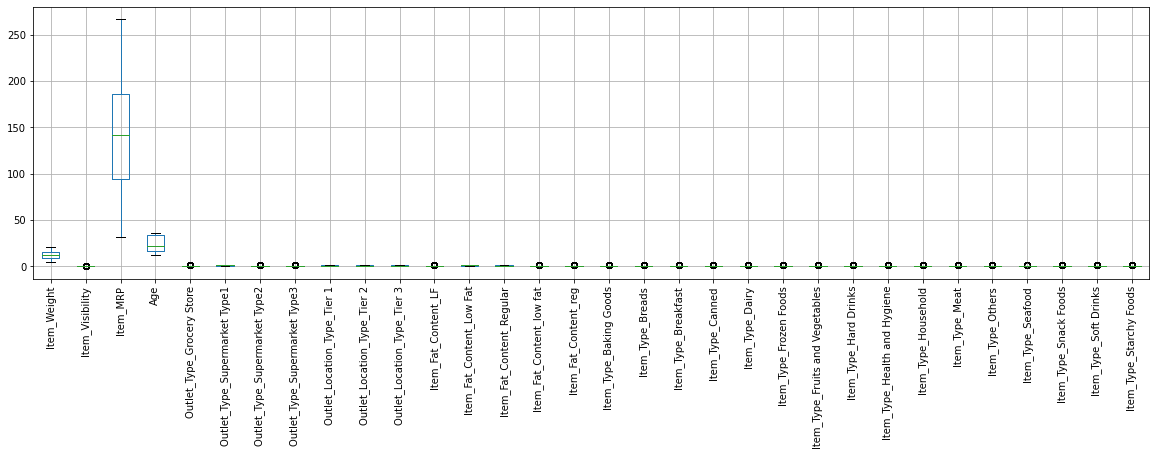

In [904]:
bigdatamart_Test.boxplot( rot = 90, figsize=(20,5))

### Checking Skewness

In [905]:
bigdatamart_Test.skew() #the skew() method searches column-wise and returns the skew of each row.

Item_Weight                         0.142813
Item_Visibility                     1.238312
Item_MRP                            0.136182
Age                                 0.396306
Outlet_Type_Grocery Store           2.239791
Outlet_Type_Supermarket Type1      -0.648977
Outlet_Type_Supermarket Type2       2.513554
Outlet_Type_Supermarket Type3       2.496167
Outlet_Location_Type_Tier 1         0.978933
Outlet_Location_Type_Tier 2         0.739189
Outlet_Location_Type_Tier 3         0.437989
Item_Fat_Content_LF                 4.962691
Item_Fat_Content_Low Fat           -0.398935
Item_Fat_Content_Regular            0.672835
Item_Fat_Content_low fat            9.117643
Item_Fat_Content_reg                8.359674
Item_Type_Baking Goods              3.171620
Item_Type_Breads                    5.610422
Item_Type_Breakfast                 8.473575
Item_Type_Canned                    3.185600
Item_Type_Dairy                     3.099217
Item_Type_Frozen Foods              2.661190
Item_Type_

All categorical columns have been encoded

### Finding Correlation

In [906]:
corr = bigdatamart_Train.corr()
corr

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Age,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Outlet_Location_Type_Tier 1,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
Item_Weight,1.000000e+00,-0.012049,0.024756,0.011550,0.008301,0.002568,-0.002649,0.001299,1.420504e-14,0.003965,...,0.029537,-0.047327,0.014199,0.035968,-0.001732,0.027165,-0.004999,0.010271,-0.047155,0.023019
Item_Visibility,-1.204853e-02,1.000000,-0.001315,-0.128625,0.074834,0.286400,-0.144249,-0.034671,-5.114446e-02,0.061346,...,0.018969,-0.003700,-0.053931,-0.032230,-0.017087,-0.016240,0.014910,0.005635,-0.009825,0.003688
Item_MRP,2.475610e-02,-0.001315,1.000000,0.567574,-0.005020,-0.004277,0.004885,0.003850,-6.713699e-03,-0.001229,...,0.023688,-0.010089,-0.041646,0.046815,-0.004086,-0.018595,0.001186,0.033817,-0.035808,0.014613
Item_Outlet_Sales,1.155000e-02,-0.128625,0.567574,1.000000,0.049135,-0.411727,0.108765,-0.038059,3.111920e-01,-0.111287,...,0.025950,-0.003956,-0.025587,0.015701,-0.002995,-0.021267,0.007380,0.022782,-0.024040,0.015039
Age,8.300836e-03,0.074834,-0.005020,0.049135,1.000000,0.281196,-0.245070,-0.466336,5.380723e-01,0.201690,...,0.005495,-0.006627,0.002961,0.001951,0.013428,0.002874,0.001013,-0.002650,-0.007486,-0.011897
Outlet_Type_Grocery Store,2.568212e-03,0.286400,-0.004277,-0.411727,0.281196,1.000000,-0.524942,-0.133364,-1.339275e-01,0.176158,...,-0.004556,-0.007189,0.001361,0.003842,0.019416,0.013963,0.007621,-0.006565,-0.004031,-0.015658
Outlet_Type_Supermarket Type1,-2.649136e-03,-0.144249,0.004885,0.108765,-0.245070,-0.524942,1.000000,-0.480943,-4.829766e-01,0.163388,...,-0.000811,0.007837,-0.005422,0.001234,-0.023912,-0.006344,-0.005367,-0.000154,0.009777,0.013516
Outlet_Type_Supermarket Type2,1.298712e-03,-0.034671,0.003850,-0.038059,-0.466336,-0.133364,-0.480943,1.000000,-1.227022e-01,-0.218082,...,0.000919,-0.003132,0.002174,-0.004979,-0.000476,0.004320,0.000138,0.001453,-0.004153,0.002553
Outlet_Type_Supermarket Type3,1.420504e-14,-0.051144,-0.006714,0.311192,0.538072,-0.133928,-0.482977,-0.122702,1.000000e+00,-0.219004,...,0.005173,-0.001143,0.004634,-0.001009,0.016172,-0.009533,-0.000091,0.005782,-0.006443,-0.006427
Outlet_Location_Type_Tier 1,3.964786e-03,0.061346,-0.001229,-0.111287,0.201690,0.176158,0.163388,-0.218082,-2.190040e-01,1.000000,...,-0.006082,-0.003272,-0.008400,-0.004202,0.004708,0.016209,0.003233,-0.001667,-0.005498,-0.010935


### Visualizing Correlation using heap map

<AxesSubplot:>

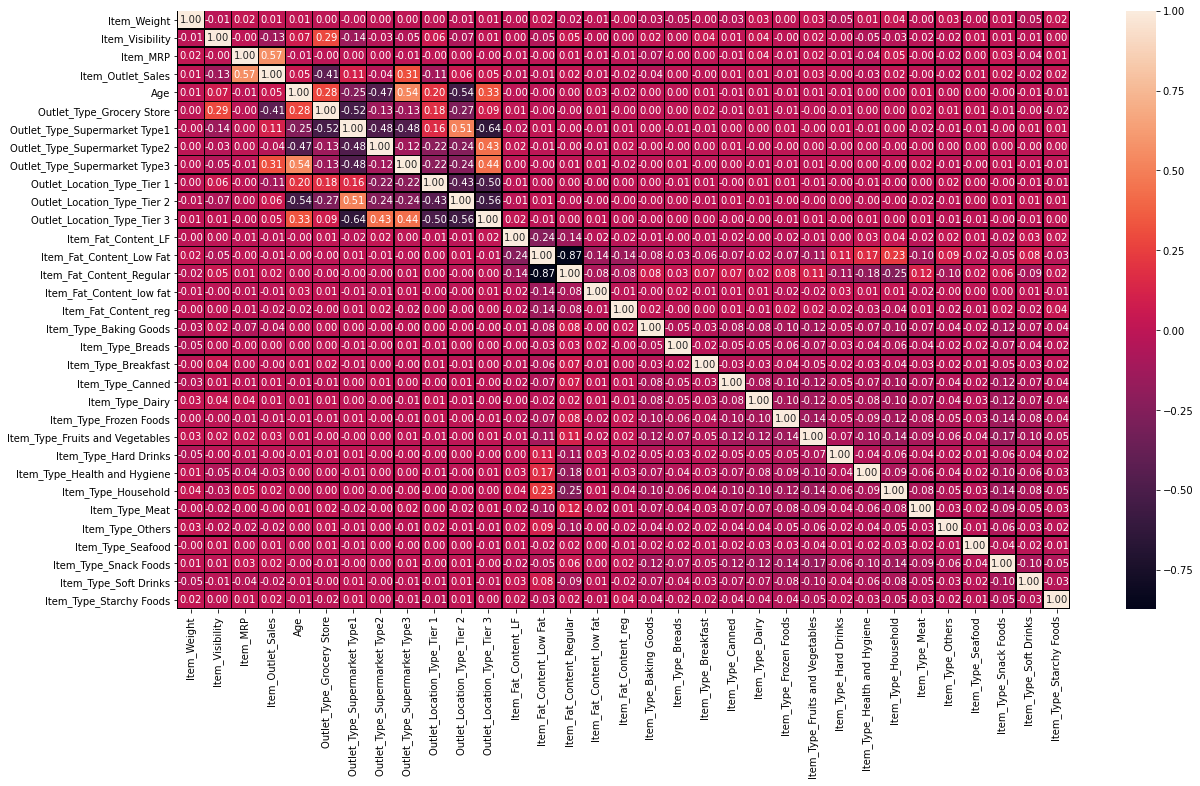

In [907]:
corr = bigdatamart_Train.corr()
plt.subplots(figsize = (20,11))
sns.heatmap(corr, annot=True ,linewidths = 0.5, linecolor="black", fmt = '0.2f' )

### Visualizing correlation of feature columns with label column.

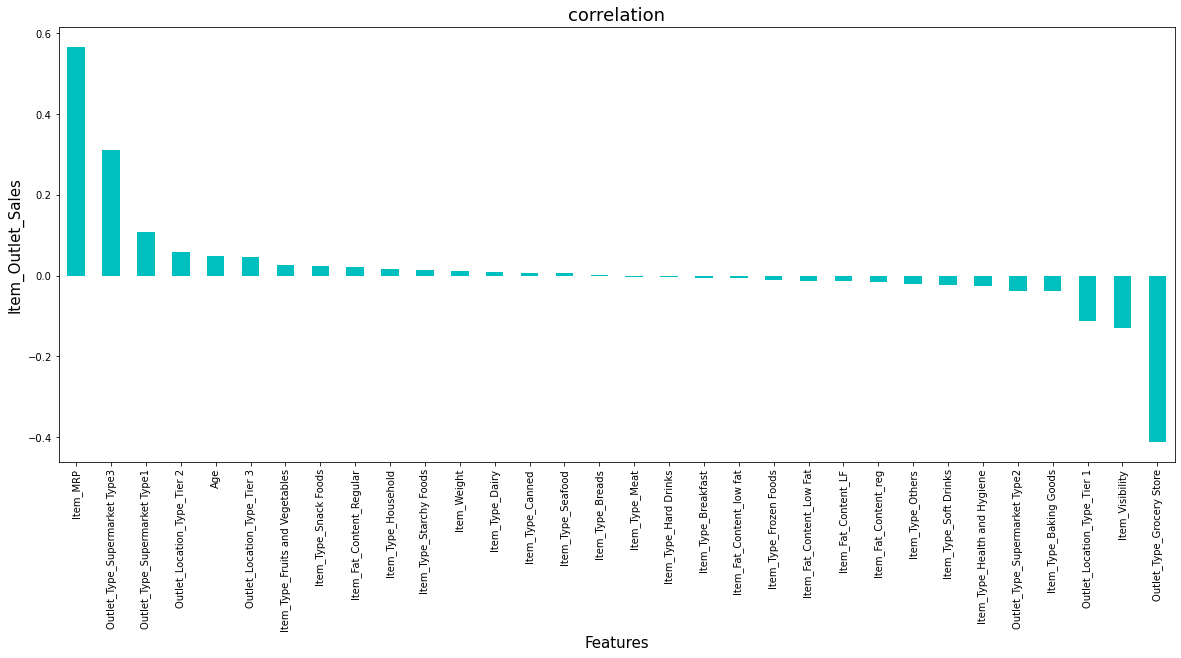

In [908]:
plt.figure(figsize = (20,8))
bigdatamart_Train.corr()['Item_Outlet_Sales'].sort_values(ascending = False).drop(['Item_Outlet_Sales']).plot(kind='bar',color = 'c')
plt.xlabel('Features',fontsize=15)
plt.ylabel('Item_Outlet_Sales',fontsize=15)
plt.title('correlation',fontsize = 18)
plt.show()

### Building Machine Learning Model

Finally, our data is all set and we are eventually ready for Predictive Modelling / Machine Learning. We will use the following machine algorithms for Predictive Modelling:

1. Linear Regression
2. Cross validation Score
3. Ridge Regression
4. Cross Val Ridge
5. Lasso & Cross Val Lasso
6. SVR and Cross Val SVR
7. Decision Tree
8. Random Forest Regressor

### Feature Selection

In [909]:
x = X_bigdatamart_Train.values #returns a numpy array
bigdatamart_Test_s = bigdatamart_Test.values
# Transform features by scaling each feature to a given range.
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled_bigdatamart_Train = min_max_scaler.fit_transform(x) # Model Training using bigdatamart_Train
x_scaled_bigdatamart_Test = min_max_scaler.fit_transform(bigdatamart_Test_s)  # Model Training using bigdatamart_Test
df_bigdatamart_Train = pd.DataFrame(x_scaled_bigdatamart_Train) # make a dataframe using bigdatamart_Train
df_bigdatamart_Test = pd.DataFrame(x_scaled_bigdatamart_Test) # make a dataframe using bidatamart_Test

In [910]:
df_bigdatamart_Train.head()  # to get the first n rows

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,0.282525,0.048866,0.927507,0.416667,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.081274,0.058705,0.072068,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.770765,0.051037,0.468288,0.416667,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.871986,0.000000,0.640093,0.458333,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.260494,0.000000,0.095805,0.916667,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


### Data Split - Training & Test Data

In [911]:
X_bigdatamart_Train, X_bigdatamart_Test, y_bigdatamart_Train, y_bigdatamart_Test = train_test_split(df_bigdatamart_Train, y_bigdatamart_Train, test_size=0.4)

#### Using Linear Regression

In [912]:
model = LinearRegression()
model.fit(X_bigdatamart_Train,y_bigdatamart_Train) # Model Training 

LinearRegression()

In [913]:
preds = model.predict(X_bigdatamart_Test) # prediction based on X_bigdatamart_Test

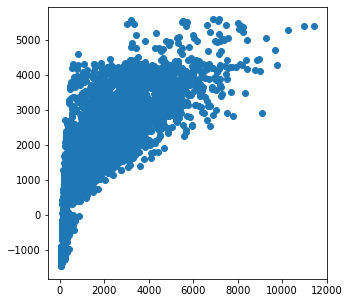

In [914]:
plt.scatter(y_bigdatamart_Test, preds)  # scatter plot graph
plt.show()

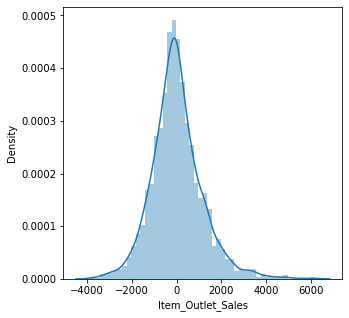

In [915]:
sns.distplot((y_bigdatamart_Test-preds),bins=50) # distribution graph based on y_bigdatamart_Test predictions
plt.show()

In [916]:
print("MAE:", metrics.mean_absolute_error(y_bigdatamart_Test, preds)) # print mean absolute error based on prediction
print('MSE:', metrics.mean_squared_error(y_bigdatamart_Test, preds)) # print mean squared error based on prediction
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_bigdatamart_Test, preds))) # print root mean square value based on prediction

MAE: 838.8145379472141
MSE: 1306155.3438100389
RMSE: 1142.871534254852


#### Cross Validation Score

In [917]:
# cv score generalizes how the model is expected to perform in general when used to make predictions on data .
cv_score = (cross_val_score(model, X_bigdatamart_Test, y_bigdatamart_Test, cv=5).mean())*100
print("Cross Validation Score:", cv_score)

Cross Validation Score: 55.380075875625046


#### Ridge Regression

In [918]:
#Ridge Regression that is used to analyse any data that suffers from multicollinearity.
r=Ridge(alpha=0.05,solver='cholesky')
r.fit(X_bigdatamart_Train,y_bigdatamart_Train) # Model training 
preds_r = model.predict(X_bigdatamart_Test)  # Predictions based on X_bigdatamart_Test
mse=metrics.mean_squared_error(y_bigdatamart_Test, preds_r) # to assign and find the mean square error based on predictions
r_score=np.sqrt(mse)
r_score

1142.871534254852

#### Cross Val Ridge

In [919]:
# finding the Cross Val Ridge based on the predictions
r=Ridge(alpha=0.05,solver='cholesky')
score=cross_val_score(r,X_bigdatamart_Test,y_bigdatamart_Test,cv=10,scoring='neg_mean_squared_error')
r_score_cross=np.sqrt(-score)
np.mean(r_score_cross),np.std(r_score_cross)

(1140.4592701024878, 61.58059485471947)

#### LASSO(Least Absolute Shrinkage & Selection)
 It performs both variable selection and regularization, in order to enhance the prediction accuracy and interpretability of the resulting statistical model.

In [920]:
l=Lasso(alpha=0.01)
l.fit(X_bigdatamart_Train,y_bigdatamart_Train) # Model training
preds_l = model.predict(X_bigdatamart_Test) # predictions based on X_bigdatamart_Test 
mse=metrics.mean_squared_error(y_bigdatamart_Test, preds_l) 
l_score=np.sqrt(mse) # using square root of mean square error finding the score
l_score              # print the score

1142.871534254852

#### Cross VAL Lasso

In [921]:
# finding the Cross Val Lasso based on the predictions
l=Lasso(alpha=0.01)
score=cross_val_score(l,X_bigdatamart_Test,y_bigdatamart_Test,cv=10,scoring='neg_mean_squared_error')
l_score_cross=np.sqrt(-score)
np.mean(l_score_cross),np.std(l_score_cross)

(1140.4482009967078, 61.57599257751975)

#### SVR
The goal of the SVM algorithm is to create the best line or decision boundary 

In [922]:
svm=SVR(epsilon=15,kernel='linear')
svm.fit(X_bigdatamart_Train,y_bigdatamart_Train)  # Model training
preds_r=svm.predict(X_bigdatamart_Test)    # predictions based on X_bigdatamart_Test
mse=metrics.mean_squared_error(y_bigdatamart_Test, preds_r) # Predictions based on mean squared error
svm_score=np.sqrt(mse)   # take a square root of mean square error to generate svm score
svm_score

1573.9279241498962

#### Cross VAL SVR
Cross validate the best line by using this alogorithm

In [923]:
svm=SVR(epsilon=15,kernel='linear')
score=cross_val_score(svm,X_bigdatamart_Test,y_bigdatamart_Test,cv=10,scoring='neg_mean_squared_error')
svm_score_cross=np.sqrt(-score)
np.mean(svm_score_cross),np.std(svm_score_cross)

(1637.5995331478368, 96.83590845395288)

#### Decision Tree
It is a tree-structured classifier with three types of nodes. Root node, Interior node and Leaf node. This algorithm is very useful for solving decision-related problems.

In [924]:
dtr=DecisionTreeRegressor() # assign a function
dtr.fit(X_bigdatamart_Train,y_bigdatamart_Train) # Model training 
preds_r=dtr.predict(X_bigdatamart_Test)  # predictions based on X_bigdatamart_Test
mse=metrics.mean_squared_error(y_bigdatamart_Test, preds_r) # to generalize the mean square error based on predictions
dtr_score=np.sqrt(mse)  # finding Decision tree regressor score based on predictions
dtr_score               # print the score

1540.6889243448582

#### Cross Val Decision Tree
Applying Cross Validation on Decision Tree Regressor based on the predictions.

In [925]:
dtr=DecisionTreeRegressor()
score=cross_val_score(dtr,X_bigdatamart_Test,y_bigdatamart_Test,cv=10,scoring='neg_mean_squared_error')
dtr_score_cross=np.sqrt(-score)
np.mean(dtr_score_cross),np.std(dtr_score_cross)

(1530.4173322496415, 45.663732433362945)

#### Random Forest Regressor
A Random Forest is an ensemble technique capable of performing both regression and classification tasks with the use of multiple decision trees and a technique called Bootstrap and Aggregation.

In [926]:
rf=RandomForestRegressor() # assign a function
rf.fit(X_bigdatamart_Train,y_bigdatamart_Train) # model training
preds_r=rf.predict(X_bigdatamart_Test) # predictions based on X_bigdatamart_Test
mse=metrics.mean_squared_error(y_bigdatamart_Test, preds_r) # to generalize the mean square error based on predictions
rf_score=np.sqrt(mse)    # finding Random tree regressor score based on predictions
rf_score                 #  print the score

1165.5649740915799

#### Cross Val RandomForest
Now Applying Cross Validation to Random Forest Regressor also.

In [927]:
rf=RandomForestRegressor()
score=cross_val_score(rf,X_bigdatamart_Test,y_bigdatamart_Test,cv=10,scoring='neg_mean_squared_error')
rf_score_cross=np.sqrt(-score)
np.mean(rf_score_cross),np.std(rf_score_cross)

(1150.6988075791837, 51.92917982156334)

### Correlation using dataframe df_bigdatamart_Train after building the complete model
Correlation explains how one or more variables are related to each other

### Heap Map
To use a heatmap the data should be in a matrix form. By matrix we mean that the index name and the column name must match in some way so that the data that we fill inside the cells are relevant.

<AxesSubplot:>

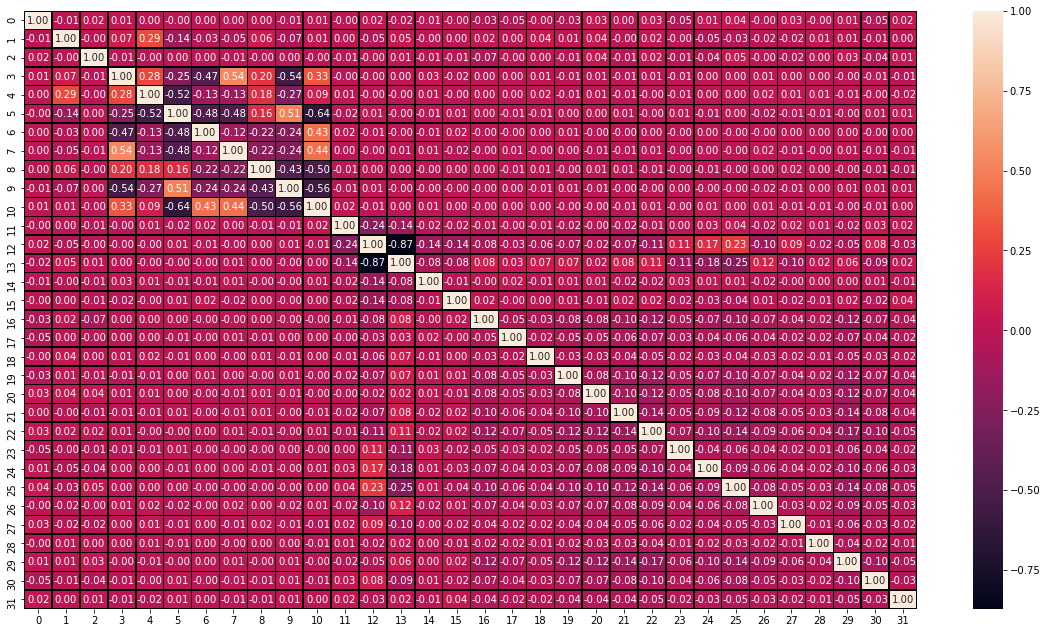

In [928]:
corr = df_bigdatamart_Train.corr()
plt.subplots(figsize = (20,11))
sns.heatmap(corr, annot=True ,linewidths = 0.5, linecolor="black", fmt = '0.2f' )

### Summary using df_bigdatamart_Train

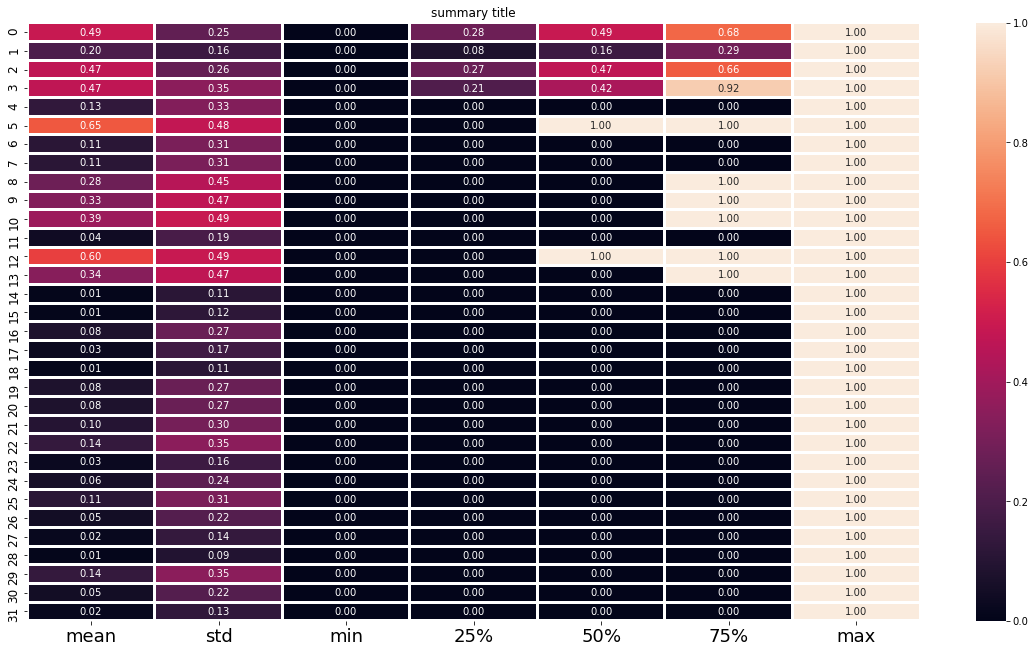

In [929]:
plt.figure(figsize = (20,11))
sns.heatmap(round(df_bigdatamart_Train.describe()[1:].transpose(),2),linewidths = 2, annot = True,fmt = '0.2f')
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 12)
plt.title("summary title")
plt.show()

### Summary using df_bigdatamart_Test

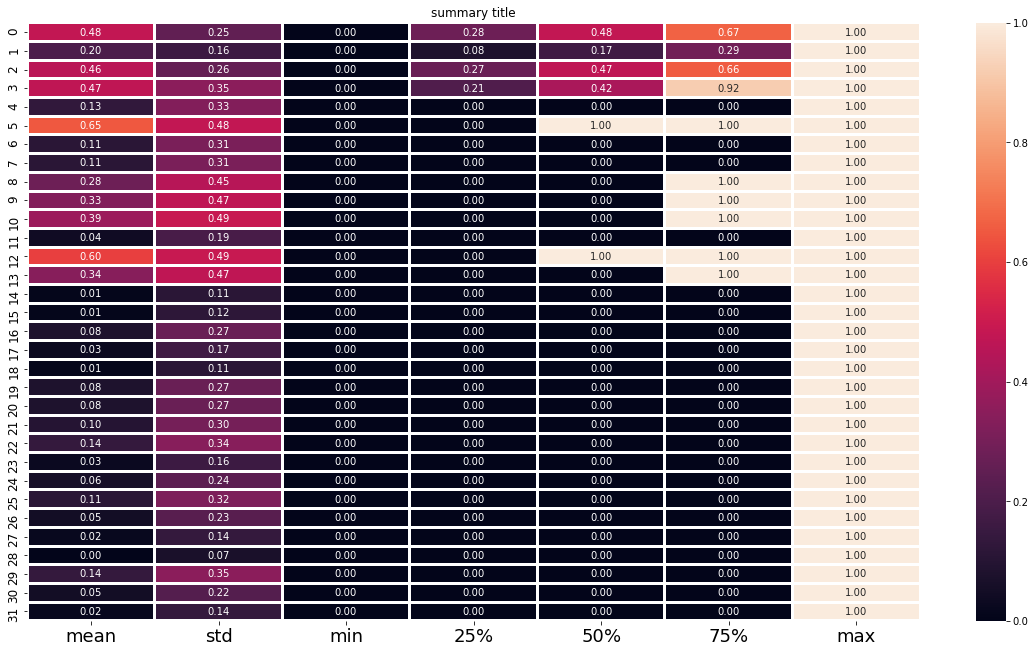

In [930]:
plt.figure(figsize = (20,11))
sns.heatmap(round(df_bigdatamart_Test.describe()[1:].transpose(),2),linewidths = 2, annot = True,fmt = '0.2f')
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 12)
plt.title("summary title")
plt.show()

# Removing Outliers
### Using ZScore-
The z-score enables a data administrator to compare two different scores that are from different normal distributions of the data.

In [931]:
import scipy.stats as stats
from scipy.stats import zscore

#using ZScore
z=np.abs(zscore(df_bigdatamart_Test))
threshold=3
np.where(z>3) # compares the scores greater than 3

df_bigdatamart_Test=df_bigdatamart_Test[(z<3).all(axis=1)]
df_bigdatamart_Test

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,0.964275,0.023374,0.323413,0.416667,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.164335,0.047548,0.524488,0.083333,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,0.312295,0.197187,0.363000,0.500000,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.104198,0.381184,0.271756,0.291667,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
10,0.717178,0.320016,0.368104,0.083333,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5669,0.484706,0.224105,0.665235,1.000000,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5672,0.137243,0.113071,0.848731,0.416667,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5673,0.149747,0.290612,0.358457,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5675,0.502828,0.217561,0.134095,0.416667,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [932]:
df_bigdatamart_Test.shape

(2569, 32)

### Percentage of Data Loss

In [933]:
data_loss=(5681-2569)/5681*100 
data_loss

54.77908818869918

### Predictions from the Trained Model

In [934]:
# Final Predictions based on how many items being sold on the basis of MRP, weight of the item  in the supermarket type1.
df_bigdatamart_Test = pd.DataFrame(x_scaled_bigdatamart_Test)
preds = model.predict(df_bigdatamart_Test)
#df_bigdatamart_Test = pd.DataFrame(x_scaled_bigdatamart_Test)

final = pd.DataFrame({"Item_Weight":bigdatamart_Test1["Item_Weight"],"Item_MRP":bigdatamart_Test1["Item_MRP"],"Outlet_Type_Grocery Store":bigdatamart_Test1["Outlet_Type_Grocery Store"],"Outlet_Type_Supermarket Type1":bigdatamart_Test1["Outlet_Type_Supermarket Type1"],"Item_Outlet_Sales":abs(preds)})
final.head()

,Item_Weight,Item_MRP,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Item_Outlet_Sales
0,20.750000,107.8622,0,1,1818.0
1,8.300000,87.3198,0,1,1398.5
2,14.600000,241.7538,1,0,1881.5
3,7.315000,155.0340,0,1,2528.0
4,12.695633,234.2300,0,0,5082.0


In [969]:
# Final Predictions based on how many items being sold on the basis of Item identifier, Outlet identifier and the total outlet sales in the supermarket type1.
df_bigdatamart_Train = pd.DataFrame(x_scaled_bigdatamart_Train)
preds = model.predict(df_bigdatamart_Train)
final = pd.DataFrame({"Item_Identifier":bigdatamart_Train["Item_Identifier"],"Outlet_Identifier":bigdatamart_Train["Outlet_Identifier"],"Item_Outlet_Sales":abs(preds)})
final.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDA15,OUT049,4036.0
1,DRC01,OUT018,453.5
2,FDN15,OUT049,2395.0
3,FDX07,OUT010,960.0
4,NCD19,OUT013,896.0


### Save the Model

In [970]:
import joblib
joblib.dump(preds,"BestModelBM.pkl") # save the best model after prediction

['BestModelBM.pkl']

### Loading The Model

In [971]:
preds=joblib.load("BestModelBM.pkl")

In [972]:
print(model.predict(x_scaled_bigdatamart_Test))    # loading the final predictions of total item outlet sales on item MRP

[1818.  1398.5 1881.5 ... 1960.  3525.  1369.5]


In [973]:
print(model.predict(x_scaled_bigdatamart_Train))  #loading the final predictions of total item outlet sales based on item identifier

[4036.   453.5 2395.  ... 1452.  1373.  1232. ]
